# INPUTS AND OUTPUTS OF THE EMPLOYEE ATTRITION SOLUTION OF COMPANY X 

DATA PREPROCESSING


In [1]:
# importing all the necessary libraries needed
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
#Math
import math

#plot imports 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline 

#machine learning imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#for evaluating our ML results
from sklearn import metrics

#Dataset Import 
import statsmodels.api as sm

In [2]:
#Concatenate the two datasets of Employeeswholeft and ExistingEmployee

In [3]:
# importing the first dataset
df1=pd.read_csv('Employeeswholeft.csv')
pd.set_option('display.max_rows',622)
df1



C:\Users\CHINA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Emp ID  satisfaction_level  last_evaluation  number_project  \
0           1.0                0.38             0.53             2.0   
1           2.0                0.80             0.86             5.0   
2           3.0                0.11             0.88             7.0   
3           4.0                0.72             0.87             5.0   
4           5.0                0.37             0.52             2.0   
...         ...                 ...              ...             ...   
1048570     NaN                 NaN              NaN             NaN   
1048571     NaN                 NaN              NaN             NaN   
1048572     NaN                 NaN              NaN             NaN   
1048573     NaN                 NaN              NaN             NaN   
1048574     NaN                 NaN              NaN             NaN   

         average_montly_hours  time_spend_company  Work_accident  \
0                       157.0                 3.0            0.0   
1                       262.0                 6.0            0.0   
2                       272.0                 4.0            0.0   
3                       223.0                 5.0            0.0   
4                       159.0                 3.0            0.0   
...                       ...                 ...            ...   
1048570                   NaN                 NaN            NaN   
1048571                   NaN                 NaN            NaN   
1048572                   NaN                 NaN            NaN   
1048573                   NaN                 NaN            NaN   
1048574                   NaN                 NaN            NaN   

         promotion_last_5years   dept  salary  Left  
0                          0.0  sales     low     1  
1                          0.0  sales  medium     1  
2                          0.0  sales  medium     1  
3                          0.0  sales     low     1  
4                          0.0  sales     low     1  
...                        ...    ...     ...   ...  
1048570                    NaN    NaN     NaN     1  
1048571                    NaN    NaN     NaN     1  
1048572                    NaN    NaN     NaN     1  
1048573                    NaN    NaN     NaN     1  
1048574                    NaN    NaN     NaN     1  

[1048575 rows x 11 columns]

In [4]:
#importing the second dataset
df2=pd.read_csv('ExistingEmployee.csv')
pd.set_option('display.max_rows',622)
df2


C:\Users\CHINA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Emp ID  satisfaction_level  last_evaluation  number_project  \
0        2001.0                0.58             0.74             4.0   
1        2002.0                0.82             0.67             2.0   
2        2003.0                0.45             0.69             5.0   
3        2004.0                0.78             0.82             5.0   
4        2005.0                0.49             0.60             3.0   
...         ...                 ...              ...             ...   
1048570     NaN                 NaN              NaN             NaN   
1048571     NaN                 NaN              NaN             NaN   
1048572     NaN                 NaN              NaN             NaN   
1048573     NaN                 NaN              NaN             NaN   
1048574     NaN                 NaN              NaN             NaN   

         average_montly_hours  time_spend_company  Work_accident  \
0                       215.0                 3.0            0.0   
1                       202.0                 3.0            0.0   
2                       193.0                 3.0            0.0   
3                       247.0                 3.0            0.0   
4                       214.0                 2.0            0.0   
...                       ...                 ...            ...   
1048570                   NaN                 NaN            NaN   
1048571                   NaN                 NaN            NaN   
1048572                   NaN                 NaN            NaN   
1048573                   NaN                 NaN            NaN   
1048574                   NaN                 NaN            NaN   

         promotion_last_5years   dept salary  Left  
0                          0.0  sales    low     0  
1                          0.0  sales    low     0  
2                          0.0  sales    low     0  
3                          0.0  sales    low     0  
4                          0.0  sales    low     0  
...                        ...    ...    ...   ...  
1048570                    NaN    NaN    NaN     0  
1048571                    NaN    NaN    NaN     0  
1048572                    NaN    NaN    NaN     0  
1048573                    NaN    NaN    NaN     0  
1048574                    NaN    NaN    NaN     0  

[1048575 rows x 11 columns]

In [6]:
df3=pd.concat([df1,df2])
df3

Emp ID  satisfaction_level  last_evaluation  number_project  \
0           1.0                0.38             0.53             2.0   
1           2.0                0.80             0.86             5.0   
2           3.0                0.11             0.88             7.0   
3           4.0                0.72             0.87             5.0   
4           5.0                0.37             0.52             2.0   
...         ...                 ...              ...             ...   
1048570     NaN                 NaN              NaN             NaN   
1048571     NaN                 NaN              NaN             NaN   
1048572     NaN                 NaN              NaN             NaN   
1048573     NaN                 NaN              NaN             NaN   
1048574     NaN                 NaN              NaN             NaN   

         average_montly_hours  time_spend_company  Work_accident  \
0                       157.0                 3.0            0.0   
1                       262.0                 6.0            0.0   
2                       272.0                 4.0            0.0   
3                       223.0                 5.0            0.0   
4                       159.0                 3.0            0.0   
...                       ...                 ...            ...   
1048570                   NaN                 NaN            NaN   
1048571                   NaN                 NaN            NaN   
1048572                   NaN                 NaN            NaN   
1048573                   NaN                 NaN            NaN   
1048574                   NaN                 NaN            NaN   

         promotion_last_5years   dept  salary  Left  
0                          0.0  sales     low     1  
1                          0.0  sales  medium     1  
2                          0.0  sales  medium     1  
3                          0.0  sales     low     1  
4                          0.0  sales     low     1  
...                        ...    ...     ...   ...  
1048570                    NaN    NaN     NaN     0  
1048571                    NaN    NaN     NaN     0  
1048572                    NaN    NaN     NaN     0  
1048573                    NaN    NaN     NaN     0  
1048574                    NaN    NaN     NaN     0  

[2097150 rows x 11 columns]

DATA CLEANING

In [7]:
df3.isnull().sum()

Emp ID                   2082151
satisfaction_level       2082151
last_evaluation          2082151
number_project           2082151
average_montly_hours     2082151
time_spend_company       2082151
Work_accident            2082151
promotion_last_5years    2082151
dept                     2082151
salary                   2082151
Left                           0
dtype: int64

In [8]:
df3.dropna(axis=0,how='any',inplace=True)

In [9]:
df3

Emp ID  satisfaction_level  last_evaluation  number_project  \
0          1.0                0.38             0.53             2.0   
1          2.0                0.80             0.86             5.0   
2          3.0                0.11             0.88             7.0   
3          4.0                0.72             0.87             5.0   
4          5.0                0.37             0.52             2.0   
...        ...                 ...              ...             ...   
11423  14207.0                0.90             0.55             3.0   
11424  14208.0                0.74             0.95             5.0   
11425  14209.0                0.85             0.54             3.0   
11426  14210.0                0.33             0.65             3.0   
11427  14211.0                0.50             0.73             4.0   

       average_montly_hours  time_spend_company  Work_accident  \
0                     157.0                 3.0            0.0   
1                     262.0                 6.0            0.0   
2                     272.0                 4.0            0.0   
3                     223.0                 5.0            0.0   
4                     159.0                 3.0            0.0   
...                     ...                 ...            ...   
11423                 259.0                10.0            1.0   
11424                 266.0                10.0            0.0   
11425                 185.0                10.0            0.0   
11426                 172.0                10.0            0.0   
11427                 180.0                 3.0            0.0   

       promotion_last_5years        dept  salary  Left  
0                        0.0       sales     low     1  
1                        0.0       sales  medium     1  
2                        0.0       sales  medium     1  
3                        0.0       sales     low     1  
4                        0.0       sales     low     1  
...                      ...         ...     ...   ...  
11423                    1.0  management    high     0  
11424                    1.0  management    high     0  
11425                    1.0  management    high     0  
11426                    1.0   marketing    high     0  
11427                    0.0          IT     low     0  

[14999 rows x 11 columns]

In [15]:
df3.isnull().any()

Emp ID                   False
satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
promotion_last_5years    False
dept                     False
salary                   False
Left                     False
dtype: bool

In [16]:
df3.head()

Emp ID  satisfaction_level  last_evaluation  number_project  \
0     1.0                0.38             0.53             2.0   
1     2.0                0.80             0.86             5.0   
2     3.0                0.11             0.88             7.0   
3     4.0                0.72             0.87             5.0   
4     5.0                0.37             0.52             2.0   

   average_montly_hours  time_spend_company  Work_accident  \
0                 157.0                 3.0            0.0   
1                 262.0                 6.0            0.0   
2                 272.0                 4.0            0.0   
3                 223.0                 5.0            0.0   
4                 159.0                 3.0            0.0   

   promotion_last_5years   dept  salary  Left  
0                    0.0  sales     low     1  
1                    0.0  sales  medium     1  
2                    0.0  sales  medium     1  
3                    0.0  sales     low     1  
4                    0.0  sales     low     1

In [17]:
df3.rename(columns={'satisfaction_level':'satisfaction',
                   'last_evaluation':'evaluation',
                   'number_project':'projectCount',
                    'average_montly_hours':'averageMonthlyHours',
                    'time_spend_company':'yearsAtCompany',
                     'Work_accident':'workAccident',
                    'promotion_last_5years':'promotion',
                     'sales':'department',
                     'Left':'turnover'},
          inplace=True)


In [18]:
front=df3['turnover']
df3.drop(labels=['turnover'],axis=1,inplace=True)
df3.insert(0,'turnover',front)
df3.head()

turnover  Emp ID  satisfaction  evaluation  projectCount  \
0         1     1.0          0.38        0.53           2.0   
1         1     2.0          0.80        0.86           5.0   
2         1     3.0          0.11        0.88           7.0   
3         1     4.0          0.72        0.87           5.0   
4         1     5.0          0.37        0.52           2.0   

   averageMonthlyHours  yearsAtCompany  workAccident  promotion   dept  salary  
0                157.0             3.0           0.0        0.0  sales     low  
1                262.0             6.0           0.0        0.0  sales  medium  
2                272.0             4.0           0.0        0.0  sales  medium  
3                223.0             5.0           0.0        0.0  sales     low  
4                159.0             3.0           0.0        0.0  sales     low

EXPLORATORY DATA ANALYSIS 

In [19]:
df3.shape

(14999, 11)

In [21]:
df3.dtypes

turnover                 int64
Emp ID                 float64
satisfaction           float64
evaluation             float64
projectCount           float64
averageMonthlyHours    float64
yearsAtCompany         float64
workAccident           float64
promotion              float64
dept                    object
salary                  object
dtype: object

In [22]:
df3.describe()

turnover        Emp ID  satisfaction    evaluation  projectCount  \
count  14999.000000  14999.000000  14999.000000  14999.000000  14999.000000   
mean       0.238083   7500.000000      0.612834      0.716102      3.803054   
std        0.425924   4329.982679      0.248631      0.171169      1.232592   
min        0.000000      1.000000      0.090000      0.360000      2.000000   
25%        0.000000   3750.500000      0.440000      0.560000      3.000000   
50%        0.000000   7500.000000      0.640000      0.720000      4.000000   
75%        0.000000  11249.500000      0.820000      0.870000      5.000000   
max        1.000000  14999.000000      1.000000      1.000000      7.000000   

       averageMonthlyHours  yearsAtCompany  workAccident     promotion  
count         14999.000000    14999.000000  14999.000000  14999.000000  
mean            201.050337        3.498233      0.144610      0.021268  
std              49.943099        1.460136      0.351719      0.144281  
min              96.000000        2.000000      0.000000      0.000000  
25%             156.000000        3.000000      0.000000      0.000000  
50%             200.000000        3.000000      0.000000      0.000000  
75%             245.000000        4.000000      0.000000      0.000000  
max             310.000000       10.000000      1.000000      1.000000

In [23]:
turnover_rate=df3.turnover.value_counts()/14999
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [24]:
#overview of the summary 
turnover_summary=df3.groupby('turnover')
turnover_summary.mean()

Emp ID  satisfaction  evaluation  projectCount  \
turnover                                                        
0         7812.340742      0.666810    0.715473      3.786664   
1         6500.439653      0.440098    0.718113      3.855503   

          averageMonthlyHours  yearsAtCompany  workAccident  promotion  
turnover                                                                
0                  199.060203        3.380032      0.175009   0.026251  
1                  207.419210        3.876505      0.047326   0.005321

FINDING OUT THE CORRELATION 

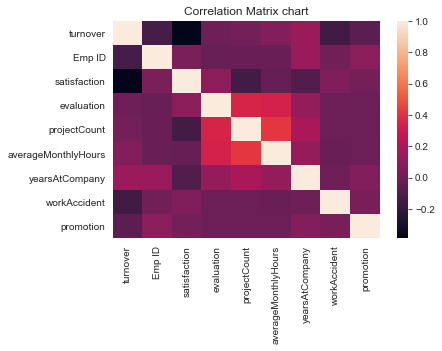

turnover    Emp ID  satisfaction  evaluation  \
turnover             1.000000 -0.129047     -0.388375    0.006567   
Emp ID              -0.129047  1.000000      0.045841   -0.018168   
satisfaction        -0.388375  0.045841      1.000000    0.105021   
evaluation           0.006567 -0.018168      0.105021    1.000000   
projectCount         0.023787 -0.012124     -0.142970    0.349333   
averageMonthlyHours  0.071287 -0.009850     -0.020048    0.339742   
yearsAtCompany       0.144822  0.144159     -0.100866    0.131591   
workAccident        -0.154622  0.015931      0.058697   -0.007104   
promotion           -0.061788  0.088994      0.025605   -0.008684   

                     projectCount  averageMonthlyHours  yearsAtCompany  \
turnover                 0.023787             0.071287        0.144822   
Emp ID                  -0.012124            -0.009850        0.144159   
satisfaction            -0.142970            -0.020048       -0.100866   
evaluation               0.349333             0.339742        0.131591   
projectCount             1.000000             0.417211        0.196786   
averageMonthlyHours      0.417211             1.000000        0.127755   
yearsAtCompany           0.196786             0.127755        1.000000   
workAccident            -0.004741            -0.010143        0.002120   
promotion               -0.006064            -0.003544        0.067433   

                     workAccident  promotion  
turnover                -0.154622  -0.061788  
Emp ID                   0.015931   0.088994  
satisfaction             0.058697   0.025605  
evaluation              -0.007104  -0.008684  
projectCount            -0.004741  -0.006064  
averageMonthlyHours     -0.010143  -0.003544  
yearsAtCompany           0.002120   0.067433  
workAccident             1.000000   0.039245  
promotion                0.039245   1.000000

In [25]:
corr=df3.corr()
corr=(corr)
ax=plt.axes()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,ax=ax)
ax.set_title('Correlation Matrix chart')
plt.show()
corr

STATISTICAL TEST FOR CORRELATION

In [26]:
# Measuring Satisfaction Level
# compare the means of the employee turnover satisfaction against the employee population satisfaction
emp_population_satisfaction=df3['satisfaction'].mean()
emp_turnover_satisfaction=df3[df3['turnover']==1]['satisfaction'].mean()
print('The mean for the employee population is : ' + str(emp_population_satisfaction))
print('The mean that had a turnover is : ' + str(emp_turnover_satisfaction))


The mean for the employee population is : 0.612833522234808
The mean that had a turnover is : 0.44009801176140917


CONDUCTING THE T-Test

In [27]:
# conducting the t-test at 95% confidence level t see if it rejects the null hypothesisthat comes from same distribution as the employee population
# we shall use the stats.test_1samp()function 
import scipy.stats as stats 
stats.ttest_1samp(a=df3[df3['turnover']==1]['satisfaction'],# sample one of employee satisfaction who had a Turnover
                    popmean= emp_population_satisfaction)

Ttest_1sampResult(statistic=-39.10948894348252, pvalue=9.012781195859014e-279)

#T-Test Result
The test result shows the test statistic 't'being equal to -39.1095 and it tells us how the sample mean deviates from the null hypothesis . if the t-statistic lies outside the quantiles of the t-distribution corresponding to the confidence level we then reject the null hypothesis. 

CHECKING THE QUANTILES

# We can check the quantile with stat.t.ppf()
# T-Test Quantile
  If the t-statistic value we got is outside , then we reject the null hypothesis

In [28]:
degree_freedom=len(df3[df3['turnover']==1])
LQ =stats.t.ppf(0.025,degree_freedom)# Left Quartile
RQ= stats.t.ppf(0.975,degree_freedom)# Right Quartile
print('The t-distribution left quartile range is:' + str(LQ))
print('The t-distribution left quartile range is:' + str(RQ))


The t-distribution left quartile range is:-1.9606285215955626
The t-distribution left quartile range is:1.9606285215955621


One-Sample T-Test summary

T-Test=-39.1095|pvalue =9.0123
Reject the null hypothesis because the score is outside the quartiles and the pvalue is below the confidence level 

# DISTRIBUTION PLOTS

In [ ]:
# Let us examine the distribution on some of the employee features
# Lets us find out if employees could be grouped in a way with these features , to find out if there
#is any correlation between evaluation and averageMonthlyHours

In [37]:
import os
for dirname,_, filename in os.walk('/desktop/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

!pip install chart_studio
!pip install cufflinks
from chart_studio.plotly import plot,iplot 
from plotly.offline import init_notebook_mode,iplot
import cufflinks 
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True,theme='pearl')
import plotly.graph_objs as go
import chart_studio
chart_studio.tools.set_credentials_file(username='CHINA',api_key='..............')
init_notebook_mode(connected=True)
print('All modules imported ')

All modules imported 


In [43]:
import plotly.express as px 
fig=px.histogram(df3,x='satisfaction',y='Emp ID',color='turnover',marginal='box',hover_data=df3.columns)
fig.update_layout(title_text='Employee Distribution Plot -Satisfaction Level ',xaxis_title='Satisfaction',yaxis_title='No of Employees')
fig.show()

import plotly.express as px 
fig=px.histogram(df3,x='averageMonthlyHours',y='Emp ID',color='turnover',marginal='box',hover_data=df3.columns)
fig.update_layout(title_text='Employee Distribution Plot -AverageMonthly Hours ',xaxis_title='Average Monthly Hours',yaxis_title='No of Employees')
fig.show()

SALARY VERSUS TURNOVER 

In [ ]:
#We intend to find out the work environment for low, medium and high salaries and what made high salaries to leave 
from plotly import graph_objs as go 
fig=go.Figure()
for name,group in df3.groupby('turnover'):
    trace=go.Histogram()
    trace.name=name
    trace.x =group['salary']
    fig.add_trace(trace)
fig.update_layout(title_text='Employee Evaluation Distribution-Satisfaction V.S.Turnover',xaxis_title='Salary',yaxis_title='No of Employees')
fig.show()

In [ ]:
from plotly import graph_objs as go 
fig=go.Figure()
for name,group in df3.groupby('turnover'):
    trace=go.Histogram()
    trace.name=name
    trace.x =group['dept']
    fig.add_trace(trace)
fig.update_layout(title_text='Employee Evaluation Distribution-Department V.S.Turnover',xaxis_title='Department',yaxis_title='No of Employees')
fig.show()

TURNOVER VERSUS PROJECT COUNT

In [ ]:
# We are yet to investigate why employees are leaving at the lower/higher spectrum of project counts
#Finding out whether employees with project counts 2 or less are not worked hard enough or are not highly valued
from plotly import graph_objs as go 
fig=go.Figure()
for name,group in df3.groupby('turnover'):
    trace=go.Histogram()
    trace.name=name
    trace.x =group['projectCount']
    fig.add_trace(trace)
fig.update_layout(title_text='Employee Evaluation Distribution-Turnover V.S.Project Count',xaxis_title='Project Count',yaxis_title='No of Employees')
fig.show()

TURNOVER VERSUS EVALUATION 

In [ ]:
import plotly.figure_factory as ff
x1=df3.loc[(df3['turnover']==0),
          'evaluation']
x2=df3.loc[(df3['turnover']==1),
          'evaluation']
group_labels=['no turnover','turnover']
colors=['blue','red']

fig=ff.create_distplot([x1,x2],group_labels,show_hist=False)
fig.update_layout(title_text='Employee Distribution KDE-Turnover V.S. No Turnover')
fig.show()

TURNOVER VERSUS AVERAGE MONTHLY HOURS

In [ ]:
import plotly.figure_factory as ff
x1=df3.loc[(df3['turnover']==0),
          'averageMonthlyHours']
x2=df3.loc[(df3['turnover']==1),
          'averageMonthlyHours']
group_labels=['no turnover','turnover']
colors=['blue','red']

fig=ff.create_distplot([x1,x2],group_labels, bin_size=1.0 , curve_type='kde', colors=colors,show_hist=False)
fig.update_layout(title_text='Employee AverageMonthly Hours Distribution KDE-Turnover V.S. No Turnover')
fig.show()

TURNOVER VERSUS SATISFACTION 

In [ ]:
import plotly.figure_factory as ff
x1=df3.loc[(df3['turnover']==0),
          'satisfaction']
x2=df3.loc[(df3['turnover']==1),
          'satisfaction']
group_labels=['no turnover','turnover']
colors=['blue','red']

fig=ff.create_distplot([x1,x2],group_labels, bin_size=1.0 , curve_type='kde', colors=colors,show_hist=False)
fig.update_layout(title_text='Employee Satisfaction Distribution KDE-Turnover V.S. No Turnover')
fig.show()

PROJECT COUNT VERSUS AVERAGE MONTHLY HOURS 

In [ ]:
#We are yet to find out if the employees who left are those who worked more hours or not 
fig=px.box(df3,x='projectCount',y='averageMonthlyHours',color='turnover')
fig.update_layout(title_text='Project Count V.S.Average Monthly Hours',xaxis_title='Project Count',yaxis_title='Average Monthly Hours')
fig.show()

PROJECT COUNT VERSUS EVALUATION 

In [ ]:
# We are to find out if the the employees who left on average had a higher evaluation or not with an increase in project count 
# To find out if employees with lower evaluations tend to leave the company more
fig=px.box(df3,x='projectCount',y='evaluation',color='turnover')
fig.update_layout(title_text='Project Count V.S.Evaluation',xaxis_title='Project Count',yaxis_title='Evaluation')
fig.show()

SATISFACTION VERSUS EVALUATION

We are yet to answer our question of what could be the reason for some employees feeling sad, happy,horrible, Hardworking to even find out bad and sad employees, Happy and Hard working employees and also Hard-working and sad employees. Through the use of 3 clusters we shall be able to represent this.

In [36]:
import plotly.express as px
fig=px.scatter(df3,x='satisfaction',y='evaluation',color='turnover')
fig.update_layout(title_text='Satisfaction V.S.Evaluation Cluster Chart',xaxis_title='Satisfaction',yaxis_title='Evaluation')
fig.show()

TURNOVER VERSUS YEARS AT COMPANY

In [48]:
# Which employees are likely to leave between 3-5year range 
#And who are those employees who left 
# Who are the part-time or contactors 



In [ ]:
import plotly.express as px
fig=px.histogram(df3,x='yearsAtCompany', y ='Emp ID ',color='turnover',marginal=" ",hover_data=df3.columns)
fig.update_layout(title_text='Turnover Rate V.S.Years Spent',xaxis_title='Years Spent',yaxis_title='No of Employees')
fig.show()

K-MEANS CLUSTERING OF EMPLOYEE TURNOVER

We shall 3 Clusters here and determine number of clusters with k-means elbow method algorithm 

In [50]:
#import KMeans Model
from sklearn.cluster import KMeans

#Graph and create 3 clusters of Employee Turnover 
kmeans=KMeans(n_clusters=3,random_state=2)
kmeans.fit(df3[df3.turnover==1][['satisfaction','evaluation']])

kmeans_colors=['green' if c==0 else 'blue' if c==2 else 'red'
for c in kmeans.labels_]

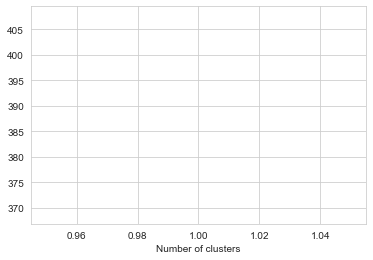

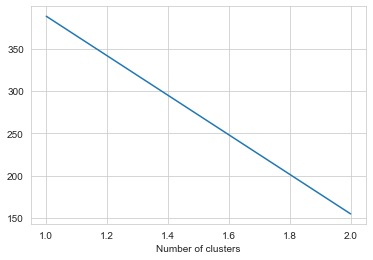

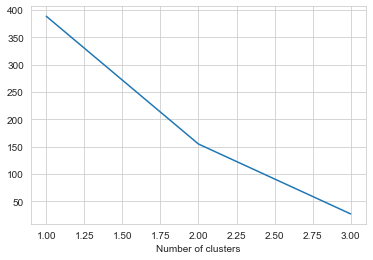

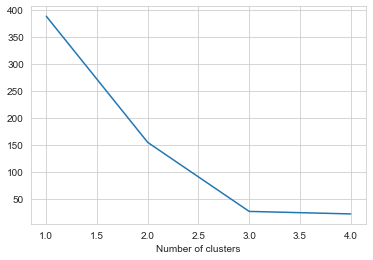

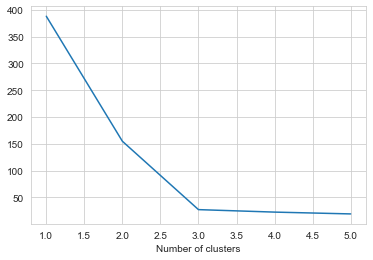

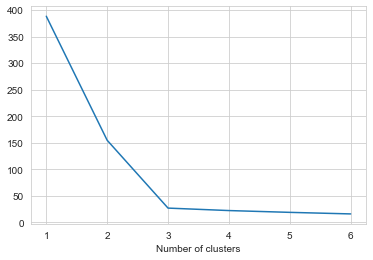

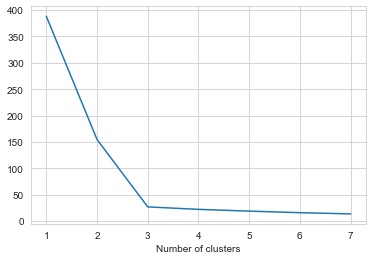

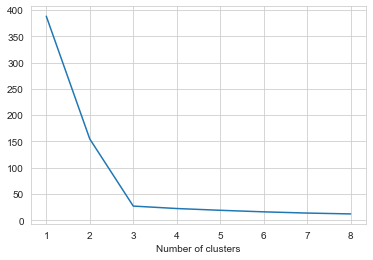

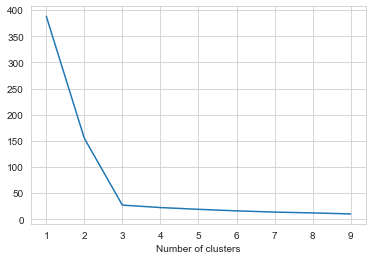

In [53]:
#Determining the number of clusters here 
# Elbow method shows that number 3 is our best fit 
sse={}
br=df3[df3.turnover==1][['satisfaction','evaluation']]
for k in range(1,10):
    kmeans=KMeans(n_clusters=k,max_iter=1000).fit(df3[df3.turnover==1][['satisfaction','evaluation']])
    sse[k]= kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()),list(sse.values()))
    plt.xlabel("Number of clusters")
    plt.show()
    

In [ ]:
import plotly.graph_objects as go
fig=go.Figure(data=[go.Scatter(x=df3['satisfaction'],y=df3['evaluation'],
                              mode='markers',
                              marker=dict(
                              color=kmeans_colors,
                              opacity=[1,0.8,0.6,0.4
                            ],
                              size=[40,60,80,100],
                              )
                              )])
fig.update_layout(title_text='Emplooyee Cluster Chart')
fig.show()

MODELING THE DATA 

In [57]:
# USING THE BASE RATE MODEL
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score,confusion_matrix,precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [58]:
# createing dummy variables for dept and salary since they are categorical 
department=pd.get_dummies(data=df3['dept'],drop_first=True,prefix='dep')
salary=pd.get_dummies(data=df3['salary'],drop_first=True,prefix='sal')
df3.drop(['dept','salary'],axis=1,inplace=True)
df3=pd.concat([df3,department,salary],axis=1)

In [59]:
# creating the base rate model 
def base_rate_model(x):
    y=np.zeros(x.shape[0])
    return y

In [63]:
#create train and test splits 
target_name='turnover'
x=df3.drop('turnover',axis=1)
robust_scaler=RobustScaler()
x=robust_scaler.fit_transform(x)
y=df3[target_name]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=123,stratify=y)
  

In [64]:
# check accuracy for the base rate model
y_base_rate=base_rate_model(x_test)
from sklearn.metrics import accuracy_score
print("Base rate accuracy is %2.2f" %accuracy_score(y_test,y_base_rate))

Base rate accuracy is 0.76


In [ ]:
#check accuracy using the logistic model 
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression (penalty='12',C=1)

model.fit(x_train,y_train)
print("Logistic accuracy is %2.2f" %accuracy_score(y_test,model.predict(x_test)))